1. Download the MNIST digits dataset from keras

In [2]:
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


2. Rescale, reshape as necessary to prepare for an autoencoder with a flattened input (not convolutional).

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

#set pixel value to 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#flatten : 28 * 28 = 784
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


3. Partition the dataset.

In [4]:
#set 15% of the train set as validation part
val_size = int(0.15 * x_train.shape[0])

x_val = x_train[:val_size]
y_val = y_train[:val_size]

x_train = x_train[val_size:]
y_train = y_train[val_size:]

print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(x_test.shape)

(9000, 784)
(9000,)
(51000, 784)
(10000, 784)


4. Build an autoencoder. At least two Dense layers in the encoder. At least two Dense layers in the decoder.

In [5]:
from tensorflow.keras import layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,512 (884.81 KB)

 Trainable params: 226,512 (884.81 KB)

 Non-trainable params: 0 (0.00 B)

6. Compile it with mean squared error reconstruction loss.

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

7. Train the autoencoder to reconstruct the input. Use at least 20 epochs. Use the test set as the validation data while training.

In [7]:
history = model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test),verbose=1)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.1006 - val_loss: 0.0403
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0362 - val_loss: 0.0264
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0256 - val_loss: 0.0219
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0217 - val_loss: 0.0194
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0193 - val_loss: 0.0176
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176 - val_loss: 0.0164
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0163 - val_loss: 0.0150
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0151 - val_loss: 0.0143
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0142 - val_loss: 0.0136
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0134 - val_loss: 0.0127
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0129 - val_loss: 0.0122
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

8. Predict the reconstructed images for all test images.

In [8]:
reconstructed_images = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


9. Visualize any 20 test images along with their reconstructions.


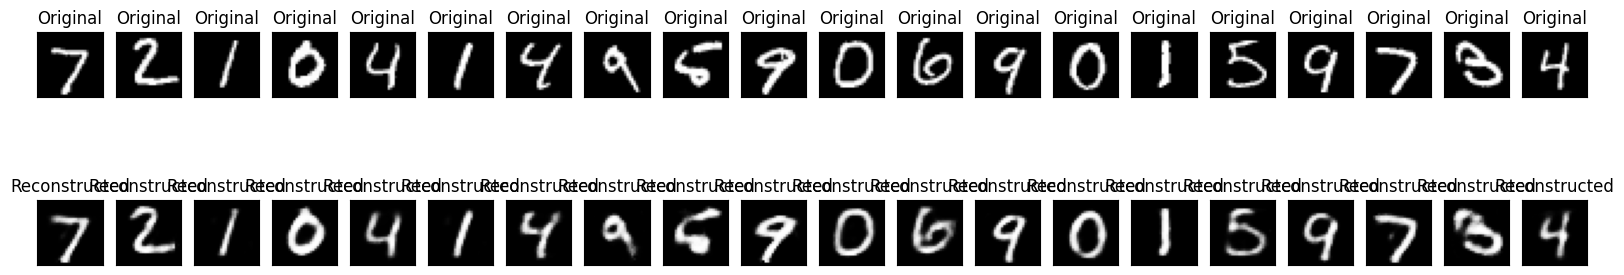

In [17]:
import matplotlib.pyplot as plt

def plot_images(original, reconstructed, n=20):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        #original images
        ax = plt.subplot(2, n, i + 1)
        plt.title("Original")
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        #reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.title("Reconstructed")
        plt.imshow(reconstructed[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

plot_images(x_test, reconstructed_images)


10. Visualize a random image from the test dataset. Also visualize its reconstruction.


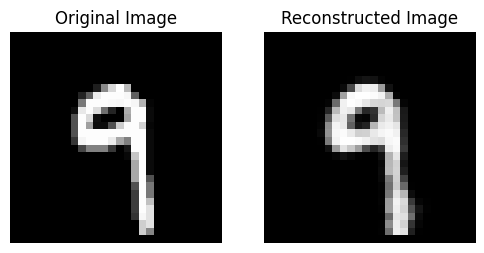

In [10]:
index = np.random.randint(0, len(x_test))

original_image = x_test[index]
reconstructed_image = reconstructed_images[index]

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


11.Print the reconstruction error. (Hint.Use model.evaluate())


In [11]:
reconstruction_error = model.evaluate(x_test, x_test)

print("Reconstruction error is: ", reconstruction_error)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0097
Reconstruction error is:  0.009362083859741688


12. Now rotate, flip upside down, or flip left to right the same random image and its reconstruction.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#before using np, transform back from flattened to 2D
original_image = original_image.reshape(28, 28)
reconstructed_image = reconstructed_image.reshape(28, 28)

rotated_original = np.rot90(original_image, 2)
rotated_reconstructed = np.rot90(reconstructed_image, 2)

flipped_ud_original = np.flipud(original_image)
flipped_ud_reconstructed = np.flipud(reconstructed_image)

flipped_lr_original = np.fliplr(original_image)
flipped_lr_reconstructed = np.fliplr(reconstructed_image)

13. Print the reconstruction error.


In [13]:
def calculate_mse(x, y):
    return np.mean((x - y) ** 2)

mse_rotated = calculate_mse(rotated_original.flatten(), rotated_reconstructed.flatten())
mse_flipped_ud = calculate_mse(flipped_ud_original.flatten(), flipped_ud_reconstructed.flatten())
mse_flipped_lr = calculate_mse(flipped_lr_original.flatten(), flipped_lr_reconstructed.flatten())

print("Rotated image reconstruction error:", mse_rotated)
print("Flipped upside down image reconstruction error:", mse_flipped_ud)
print("Flipped left/right image reconstruction error:", mse_flipped_lr)

Rotated image reconstruction error: 0.0049645333
Flipped upside down image reconstruction error: 0.004964533
Flipped left/right image reconstruction error: 0.0049645333


14. Comment on the reconstruction error.


In [ ]:
# The Reconstruction error for these three images are both low and almost the same,
#  so that we can conclude that our model has the ability to provide consistent reconstruction
#  in different space transitions. And also, the low reconstruction error means low difference between
#  the original images and reconstruction one, showing that the original image might not be vary abnormal.

15. Comment on anomaly detection of this image

In [ ]:
# Based on the result, we can say that our model has a good ability of recognizing abnormal images.
# Sometimes the image is not that abnormal so our reconstruction error is low. Like this image, the
# overall reconstruction error is larger than the chosen image, showing that this image is less
# abnormal than most of the images in the test set.